In [20]:
import os
import cv2
import random
import pandas as pd
import matplotlib.pyplot as plt
random.seed(777)

In [21]:
# Set the path to your dataset directory
dataset_dir = ""

# Specify the directory containing the train and val images
train_dir = os.path.join(dataset_dir, "train/images")
label_dir_train = os.path.join(dataset_dir, "train/labels")
val_dir = os.path.join(dataset_dir, "val/images")
label_dir_val = os.path.join(dataset_dir, "val/labels")

# Get a list of all image files in the train directory
image_files = [f for f in os.listdir(train_dir) if f.endswith(("100.jpg", ".jpeg", "101.jpg", "102.jpg"))]

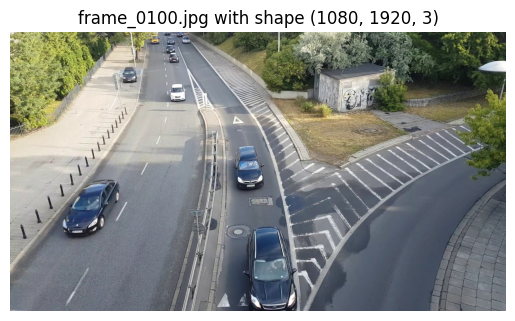

In [22]:
# Randomly select one image to display
random_image = random.choice(image_files)

# Load and display the selected image
image_path = os.path.join(train_dir, random_image)
image = cv2.imread(image_path)  # Read the image using OpenCV
img_shape = image.shape
if image is not None:
    # OpenCV reads images in BGR format, so convert to RGB for Matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 
    plt.title(f"{random_image} with shape {img_shape}")
    plt.axis('off')
    plt.show()
else:
    print(f"Failed to read {random_image}")

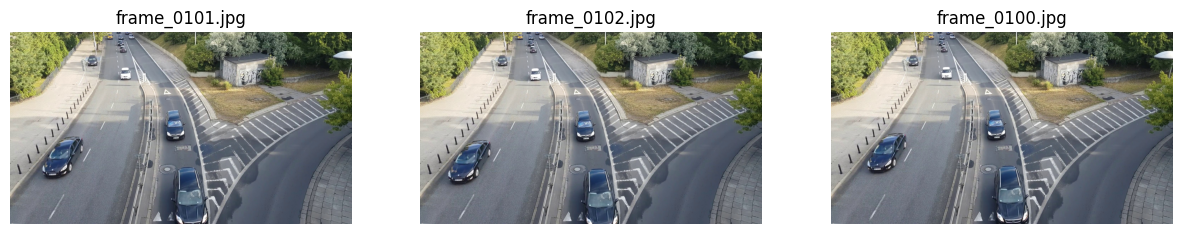

In [23]:
# Randomly select 3 images to display
random_images = random.sample(image_files, 3)

# Create a subplot with 1 row and 3 columns
plt.figure(figsize=(15, 5))
for i, image_file in enumerate(random_images):
    image_path = os.path.join(train_dir, image_file)
    image = cv2.imread(image_path)  # Read the image using OpenCV

    if image is not None:
        plt.subplot(1, 3, i + 1)
        # OpenCV reads images in BGR format, so convert to RGB for Matplotlib
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  
        plt.title(image_file)
        plt.axis('off')

plt.show()

In [24]:
class_file_path = "classes.txt"

with open(class_file_path, 'r') as class_file:
    classes = class_file.read().splitlines()

if len(classes) > 0:
    print("Classes:")
    for class_label in classes:
        print(class_label)
else:
    print("No classes found in the file.")

Classes:
car


In [25]:
label_file_path = "train/labels/frame_0000.txt"

# Read the label file into a Pandas DataFrame
column_names = ["class", "x_min", "y_min", "x_max", "y_max"]
df = pd.read_csv(label_file_path, header=None, names=column_names, sep=" ")
df

,class,x_min,y_min,x_max,y_max
0,0,0.217969,0.441667,0.091146,0.129630
1,0,0.332552,0.242593,0.043229,0.100000
2,0,0.291406,0.125463,0.031771,0.060185
3,0,0.238802,0.138426,0.031771,0.060185
4,0,0.297396,0.049074,0.023958,0.038889
5,0,0.320052,0.019907,0.017188,0.030556
6,0,0.465104,0.316204,0.055208,0.125000
7,0,0.495052,0.482407,0.067187,0.177778
8,0,0.141406,0.965278,0.116146,0.069444


In [26]:
# Count the number of images in each directory
num_train_images = len([f for f in os.listdir(train_dir) if f.endswith((".jpg", ".jpeg"))])
num_val_images = len([f for f in os.listdir(val_dir) if f.endswith((".jpg", ".jpeg"))])

# Calculate the total number of images
total_images = num_train_images + num_val_images

# Calculate the percentage of images in each folder
percentage_train = (num_train_images / total_images) * 100
percentage_val = (num_val_images / total_images) * 100

print(f"Total Number of images {total_images}")
print(f"Percentage of images in the training folder: {percentage_train:.2f}%")
print(f"Percentage of images in the validation folder: {percentage_val:.2f}%")

Total Number of images 499
Percentage of images in the training folder: 79.96%
Percentage of images in the validation folder: 20.04%


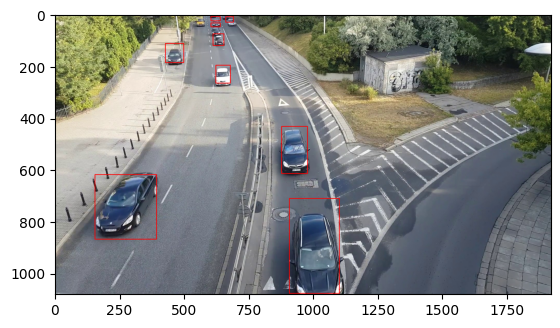

In [27]:
# Randomly select one image to display
random_image = random.choice(image_files)

# Load the selected image
image_path = os.path.join(train_dir, random_image)
image = cv2.imread(image_path)  # Read the image using OpenCV

# Load the corresponding label file
label_file_path = os.path.join(label_dir_train, random_image.replace('.jpg', '.txt'))

# Image shape
image_height, image_width, _ = image.shape

# Read YOLO labels from the label file
with open(label_file_path, 'r') as file:
    yolo_labels = file.readlines()

# Convert relative coordinates to absolute coordinates and draw rectangles
for label in yolo_labels:
    class_id, x_center, y_center, width, height = map(float, label.split())

    # Convert relative coordinates to absolute coordinates
    x_center *= image_width
    y_center *= image_height
    width *= image_width
    height *= image_height

    # Calculate top-left and bottom-right coordinates
    x1 = int(x_center - width / 2)
    y1 = int(y_center - height / 2)
    x2 = int(x_center + width / 2)
    y2 = int(y_center + height / 2)

    color = (0, 0, 255)
    thikness = 2
    # Draw rectangle on the image
    cv2.rectangle(image, (x1, y1), (x2, y2), color, thikness)

# Display the image with rectangles
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [28]:
# Function to convert relative coordinates to absolute coordinates
def convert_coordinates(x_center, y_center, width, height, image_width, image_height):
    x_center *= image_width
    y_center *= image_height
    width *= image_width
    height *= image_height

    x1 = int(x_center - width / 2)
    y1 = int(y_center - height / 2)
    x2 = int(x_center + width / 2)
    y2 = int(y_center + height / 2)

    return x1, y1, x2, y2

nom de l'image : train/images\frame_0100.jpg
nom de l'image : train/images\frame_0101.jpg
nom de l'image : train/images\frame_0102.jpg


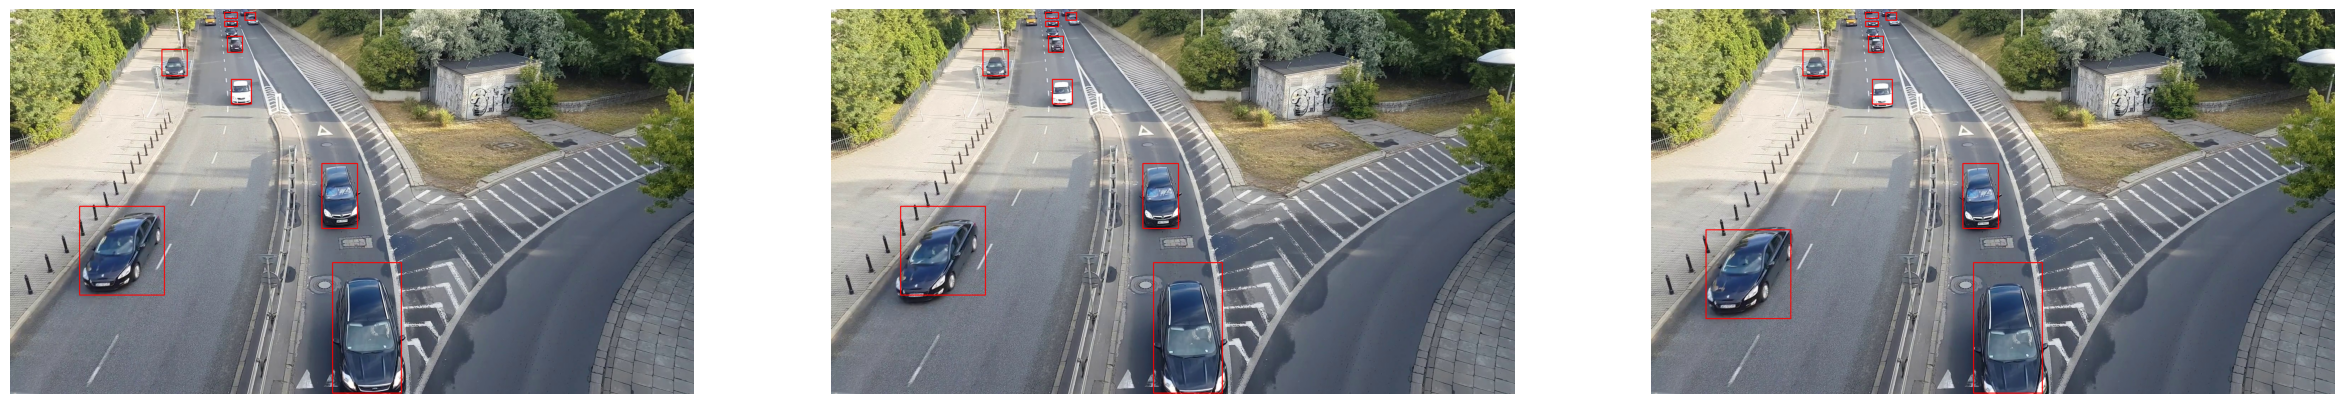

In [46]:
# Number of images to display
num_images = 3

# Create subplots
fig, axes = plt.subplots(1, num_images, figsize=(30, 30))

for i in range(num_images):
    # Randomly select one image to display
    # random_image = random.choice(image_files)
    random_image = image_files[i]

    # Load the selected image
    image_path = os.path.join(train_dir, random_image)
    print(f"nom de l'image : {image_path}")
    image = cv2.imread(image_path)  # Read the image using OpenCV

    # Load the corresponding label file
    label_file_path = os.path.join(label_dir_train, random_image.replace('.jpg', '.txt'))

    # Image shape
    image_height, image_width, _ = image.shape

    # Read YOLO labels from the label file
    with open(label_file_path, 'r') as file:
        yolo_labels = file.readlines()

    # Convert relative coordinates to absolute coordinates and draw rectangles
    for label in yolo_labels:
        class_id, x_center, y_center, width, height = map(float, label.split())

        x1, y1, x2, y2 = convert_coordinates(x_center, y_center, width, height, image_width, image_height)

        color = (0, 0, 255)
        thickness = 2
        # Draw rectangle on the image
        # print(f"x1 : {x1}, y1 : {y1}, x2 : {x2}, y2: {y2}")
        cv2.rectangle(image, (x1, y1), (x2, y2), color, thickness)

    # Display the image with rectangles in the subplot
    axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[i].axis('off')  # Turn off axis labels

plt.show()